# Homework 6. KNN - Handwritten digits

***Double Click here to edit this cell***

- Name: 김수연
- Student ID: 201800839
- Submission date: 2020 6/7 일요일

### We have 1797 handwritten digits of size 8x8 

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)

(1797, 64)


In [2]:
digits.target.shape


(1797,)

### Try with some handwritten images

Target is 0
Data is :

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


<Figure size 432x288 with 0 Axes>

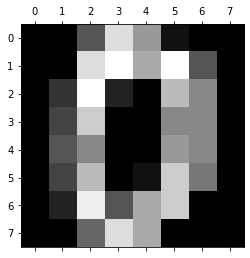

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt 

k = 0
print('Target is {}'.format(digits.target[k]))
print('Data is :\n')
print(digits.data[k].reshape(8,8))
plt.gray()
plt.matshow(digits.images[k]) 
plt.show() 

# Problem 1 (30 pts)

- We want to classify handwritten digits using **k nearest neighbor classifier**

## STEP 1

- import whatever you need
- don't modify the random number seed
- you must set "np.random.seed(0)"" before you do "train_test_split"
- Split the data into training dataset (2/3 of the total data), test dataset(1/3 of the total data)

In [4]:
from sklearn import datasets

digits = datasets.load_digits()

# YOUR CODE HERE
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

X_digits, y_digits = np.array(digits.data), list(digits.target)
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, test_size=0.33)



## STEP 2

- Use sklearn k nearest neighbor classifier to classify digits
- Print confusion matrix, classification report, accuracy
- This homework will be graded based on **accuracy**

In [5]:
acc = []
k_list = [1, 3, 5, 7, 9]
for k in k_list:    
    classifier = KNeighborsClassifier(k)
    classifier.fit(X_train, y_train)
    
    y_true = y_test
    y_pred = classifier.predict(X_test)
    
    acc.append(accuracy_score(y_true, y_pred))
    accuracy = max(acc)
    best_k = k_list[np.argmax(np.array(acc))]
    
classifier = KNeighborsClassifier(best_k)
classifier.fit(X_train, y_train)

y_true = y_test
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cr = classification_report(y_true, y_pred,
                            labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# YOUR CODE HERE

print('confusion matrix : \n')
print(cm)
print('\n\nclassification_report : \n')
print(cr)
print('Average accuracy = {:.2f}%'.format(accuracy*100))

confusion matrix : 

[[49  0  0  0  0  0  0  0  0  0]
 [ 0 61  0  0  0  0  0  0  0  0]
 [ 0  0 62  0  0  0  0  0  0  0]
 [ 0  0  0 55  0  0  0  0  0  0]
 [ 0  0  0  0 50  0  0  0  0  0]
 [ 0  0  0  0  0 63  1  0  0  1]
 [ 0  0  0  0  0  0 67  0  0  0]
 [ 0  0  0  0  0  0  0 56  0  0]
 [ 0  2  0  1  0  0  0  0 64  0]
 [ 0  0  0  3  0  1  0  0  0 58]]


classification_report : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       0.97      1.00      0.98        61
           2       1.00      1.00      1.00        62
           3       0.93      1.00      0.96        55
           4       1.00      1.00      1.00        50
           5       0.98      0.97      0.98        65
           6       0.99      1.00      0.99        67
           7       1.00      1.00      1.00        56
           8       1.00      0.96      0.98        67
           9       0.98      0.94      0.96        62

    accuracy            

My result:
```
confusion matrix : 

[[49  0  0  0  0  0  0  0  0  0]
 [ 0 61  0  0  0  0  0  0  0  0]
 [ 0  0 62  0  0  0  0  0  0  0]
 [ 0  0  0 55  0  0  0  0  0  0]
 [ 0  0  0  0 50  0  0  0  0  0]
 [ 0  0  0  0  0 63  1  0  0  1]
 [ 0  0  0  0  0  0 67  0  0  0]
 [ 0  0  0  0  0  0  0 56  0  0]
 [ 0  2  0  1  0  0  0  0 64  0]
 [ 0  0  0  3  0  1  0  0  0 58]]


classification_report : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       0.97      1.00      0.98        61
           2       1.00      1.00      1.00        62
           3       0.93      1.00      0.96        55
           4       1.00      1.00      1.00        50
           5       0.98      0.97      0.98        65
           6       0.99      1.00      0.99        67
           7       1.00      1.00      1.00        56
           8       1.00      0.96      0.98        67
           9       0.98      0.94      0.96        62

    accuracy                           0.98       594
   macro avg       0.99      0.99      0.99       594
weighted avg       0.99      0.98      0.98       594

Average accuracy = 98.48%
```

## State-of-the-Art of MNIST classification: 99.79%

- https://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html
- MNIST dataset is much bigger dataset: 60,000 training images and 10,000 testing images

# Problem 2 (30 pts)

- If you choose any hyperparameters and you did any transformation in your data, justify your choice and transformation.
- The justification must be code, data, or plotted images, **not your guess!!!**
- This must be a longer code. 
- Use plotted image whenever possible.
- You may add as many cells as you want.
- To add a cell, insert->insert cell or click '+' button above in the notebook.
- you must set "np.random.seed(0)"" before you do "train_test_split"

In [6]:
# ADD YOUR CELL

In [7]:
from collections import Counter
from linear_algebra import distance
import math, random
import matplotlib.pyplot as plt


In [8]:
# ADD YOUR CELL


# you must set "np.random.seed(0)"" before you do "train_test_split"

In [9]:
X_digits, y_digits = np.array(digits.data), list(digits.target)
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, test_size=0.33)


In [10]:

acc = []
k_list = [k for k in range(1, 11)]
for k in k_list:    
    classifier = KNeighborsClassifier(k)
    classifier.fit(X_train, y_train)
    
    y_true = y_test
    y_pred = classifier.predict(X_test)
    
    acc.append(accuracy_score(y_true, y_pred))
    accuracy = max(acc)
    best_k = k_list[np.argmax(np.array(acc))]
    
    
classifier = KNeighborsClassifier(best_k)
classifier.fit(X_train, y_train)

y_true = y_test
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cr = classification_report(y_true, y_pred,
                            labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# YOUR CODE HERE

print('confusion matrix : \n')
print(cm)
print('\n\nclassification_report : \n')
print(cr)
print('Average accuracy = {:.2f}%'.format(accuracy*100))

confusion matrix : 

[[49  0  0  0  0  0  0  0  0  0]
 [ 0 61  0  0  0  0  0  0  0  0]
 [ 0  0 62  0  0  0  0  0  0  0]
 [ 0  0  0 55  0  0  0  0  0  0]
 [ 0  0  0  0 50  0  0  0  0  0]
 [ 0  0  0  0  0 63  1  0  0  1]
 [ 0  0  0  0  0  0 67  0  0  0]
 [ 0  0  0  0  0  0  0 56  0  0]
 [ 0  2  0  1  0  0  0  0 64  0]
 [ 0  0  0  3  0  1  0  0  0 58]]


classification_report : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       0.97      1.00      0.98        61
           2       1.00      1.00      1.00        62
           3       0.93      1.00      0.96        55
           4       1.00      1.00      1.00        50
           5       0.98      0.97      0.98        65
           6       0.99      1.00      0.99        67
           7       1.00      1.00      1.00        56
           8       1.00      0.96      0.98        67
           9       0.98      0.94      0.96        62

    accuracy            

In [11]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

def plot_tsne(data, target, target_names, learning_rate=100, perplexity=30):
    model = TSNE(learning_rate=learning_rate, perplexity=perplexity) #, metric='euclidean')
    embedded = model.fit_transform(data)
    xs = embedded[:,0]
    ys = embedded[:,1]
    for t in np.unique(target):
        i = np.where(target == t)
        plt.scatter(xs[i], ys[i], label=target_names[t])
 
    # plt.scatter(xs,ys,c=target,label=target)
    plt.legend(loc=1)
    plt.show()

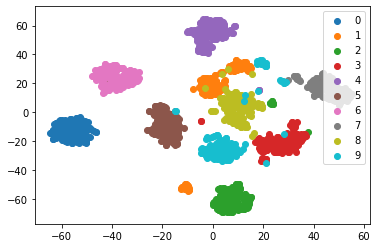

In [12]:

plot_tsne(digits.data, digits.target, digits.target_names)

- This is my result. 

```
confusion matrix : 

[[49  0  0  0  0  0  0  0  0  0]
 [ 0 61  0  0  0  0  0  0  0  0]
 [ 0  0 61  1  0  0  0  0  0  0]
 [ 0  0  0 55  0  0  0  0  0  0]
 [ 0  0  0  0 50  0  0  0  0  0]
 [ 0  0  0  0  0 63  1  0  0  1]
 [ 0  0  0  0  0  0 67  0  0  0]
 [ 0  0  0  0  0  0  0 56  0  0]
 [ 0  2  0  0  0  0  0  0 65  0]
 [ 0  0  0  1  0  0  0  0  0 61]]


classification_report : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       0.97      1.00      0.98        61
           2       1.00      0.98      0.99        62
           3       0.96      1.00      0.98        55
           4       1.00      1.00      1.00        50
           5       1.00      0.97      0.98        65
           6       0.99      1.00      0.99        67
           7       1.00      1.00      1.00        56
           8       1.00      0.97      0.98        67
           9       0.98      0.98      0.98        62

    accuracy                           0.99       594
   macro avg       0.99      0.99      0.99       594
weighted avg       0.99      0.99      0.99       594

Average accuracy = 98.99%
```

### Written justification for your hyperparameter choice and data transformation

- hyperparameter를 어떻게 설정하냐에 따라서 정확도에 큰 변화가 있다. 데이터를 토대로 분석한 추정값으로 hyperparameter를 추측하면 어느정도 맞아떨어진다. accuracy가 높게 나타나는 hyperparameter로 설정했다



## Ethics:
If you cheat, you will get negatgive of the total points.
If the homework total is 22 and you cheat, you get -22.

## What to submit
- Run **all cells**
- Goto "File -> Print Preview" (If that doesn't work, you may print ipynb file in Google Chrome print menu)
- Print the page as pdf
- Submit the pdf file in google classroom
- No late homeworks accepted